# Hw03 

## 2. read signals of Ch 1 in the 2nd test dataset of IMS bearing data.

### (a) Calculate the mean, standard deviation, variance, skewness, and kurtosis of the data as the 5-dimensional features.

In [1]:
import numpy as np
import os
import pandas as pd
from scipy.stats import skew 
from scipy.stats import kurtosis

In [11]:
path, dirs, files = next(os.walk("./IMS_data/"))
Features=[]
for file in files:
    data = pd.read_csv('./IMS_data/'+file, sep = '\t',
                       names = ['ch1', 'ch2', 'ch3', 'ch4'])
    ch1 = data.ch1.values
    mn = np.mean(ch1)
    sd = np.std(ch1)
    v = np.var(ch1)
    sk = skew(ch1)
    ku = kurtosis(ch1)
    Features.append([mn, sd, v, sk, ku])
X = np.asarray(Features)
X.shape

(984, 5)

In [12]:
for feature in Features:
    print(feature)

[-0.00165927734375, 0.10660886235708322, 0.011365449533071517, -0.014485438513994801, 0.7654697765915444]
[-0.0019072265624999999, 0.07528655729607739, 0.005668065709495544, -0.019873256649079945, 0.2905308522713739]
[-0.0018225097656250002, 0.18458911955411558, 0.03407314305776358, -0.5200580426597082, 2.4108261616448203]
[-0.001947021484375, 0.07693101411986752, 0.005918380933511257, -0.012696409772231567, 0.44699011171583214]
[-0.002700634765625, 0.07572478230967107, 0.005734242655847073, 0.03175156805882329, 0.5881648615563311]
[-0.0009719238281250001, 0.07800105820352181, 0.0060841650808691975, 0.02101306121225579, 0.34814837459687187]
[-0.002096875, 0.07632805872566212, 0.005825972548828126, 0.008385265342815654, 0.49909250576170816]
[-0.0023712402343749996, 0.16882029445348168, 0.028500291819360257, -0.03884108424155056, 2.248777066522476]
[-0.0019568847656250003, 0.07787621792826703, 0.0060647053188109395, 0.00792259653450327, 0.33876064158508923]
[-0.0018154296875000004, 0.077

### (b) Apply Principal Component Analysis (PCA) to reduce the dimension to 3.
### Normalize the values with respect to the means of the features. Show thesingular values and the fraction 𝑚3 .

In [23]:
from sklearn.decomposition import PCA
pca_5 = PCA(n_components = 5,svd_solver = 'full')
pca_3 = PCA(n_components = 3,svd_solver = 'full')
pca_5.fit(Features)
pca_3.fit(Features)

PCA(n_components=3, svd_solver='full')

In [30]:
print('singular value : ',pca_3.singular_values_)

singular value :  [30.37384326  2.20618242  1.17723317]


In [31]:
print(pca_3.explained_variance_ratio_)

[0.9931559  0.00523963 0.00149191]


In [32]:
a=0
b=0
for i in pca_5.singular_values_:
    a+=i
for j in pca_3.singular_values_:
    b+=j
print(a)
print(b)
m3=b/a
print('m3 :',m3)

34.095878427997626
33.75725885779998
m3 : 0.9900686069457713


## 3. Using K-means to the data in Problem 2 with the following features.

### (a) Mean and standard deviation.

In [1]:
from sklearn.cluster import KMeans
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path, dirs, files = next(os.walk("./IMS_data/"))
a_x=[]
for file in files:
    data = pd.read_csv('./IMS_data/'+file, sep = '\t',
                       names = ['ch1', 'ch2', 'ch3', 'ch4'])
    ch1 = data.ch1.values
    mn = np.mean(ch1)
    sd = np.std(ch1)
    a_x.append([mn, sd])
a_x_array = np.asarray(a_x)

In [3]:
a_kmeans = KMeans(n_clusters=3, random_state=0, n_init = 'auto').fit(a_x_array)

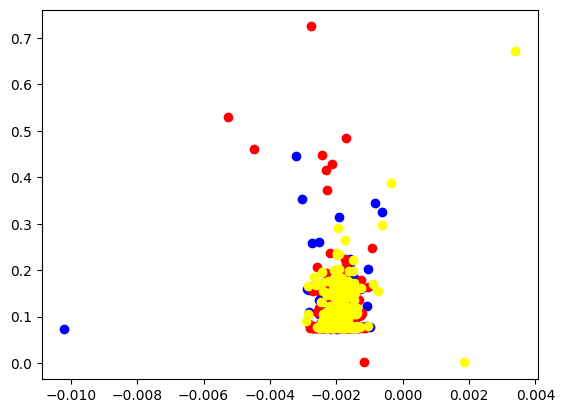

In [4]:
N = len(a_x_array)
plt.scatter(a_x_array[:N//3, 0], a_x_array[:N//3, 1], c='blue')
plt.scatter(a_x_array[N//3:2*N//3, 0], a_x_array[N//3:2*N//3, 1], c='red')
plt.scatter(a_x_array[2*N//3:, 0], a_x_array[2*N//3:, 1], c='yellow')
plt.show()

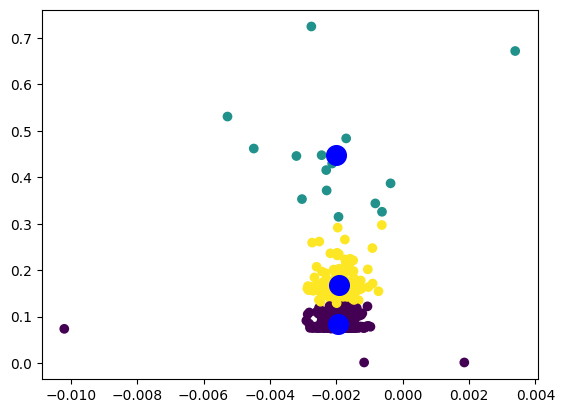

In [5]:
plt.scatter(a_x_array[:, 0], a_x_array[:, 1], c=a_kmeans.labels_)
plt.scatter(a_kmeans.cluster_centers_[:, 0], a_kmeans.cluster_centers_[:, 1], s = 200, c='b')
plt.show()

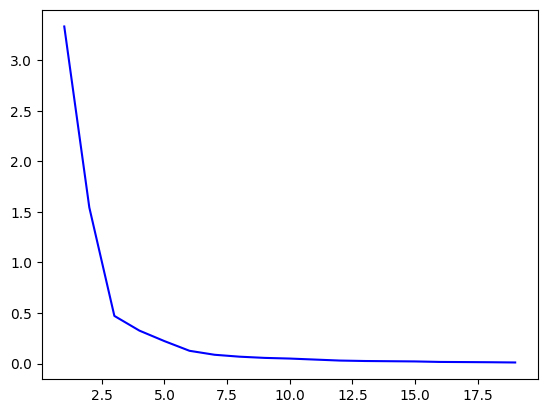

[3.3335073405768907, 1.5437943600681718, 0.47184066119688867, 0.3263155785514123, 0.2224536863199877, 0.12684839063424416, 0.0876467140537568, 0.06861632560039828, 0.05673242284205355, 0.050154442391902, 0.04018282522475152, 0.03034771052249704, 0.02593460721483145, 0.023868806114232602, 0.021751807453554012, 0.01679089666830068, 0.015374563314810125, 0.013810744978228467, 0.011388628323288037]


In [6]:
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101, n_init = 'auto')
    kmeans.fit(a_x_array)
    elbow.append(kmeans.inertia_)
plt.plot(range(1, 20), elbow,color='blue')

plt.show()
print(elbow)

### (b) Standard deviation and kurtosis.

In [7]:
from scipy.stats import kurtosis

In [8]:
path, dirs, files = next(os.walk("./IMS_data/"))
b_x=[]
for file in files:
    data = pd.read_csv('./IMS_data/'+file, sep = '\t',
                       names = ['ch1', 'ch2', 'ch3', 'ch4'])
    ch1 = data.ch1.values
    sd = np.std(ch1)
    ku = kurtosis(ch1)
    b_x.append([sd, ku])
b_x_array = np.asarray(b_x)

In [9]:
b_kmeans = KMeans(n_clusters=3, random_state=0, n_init = 'auto').fit(b_x_array)

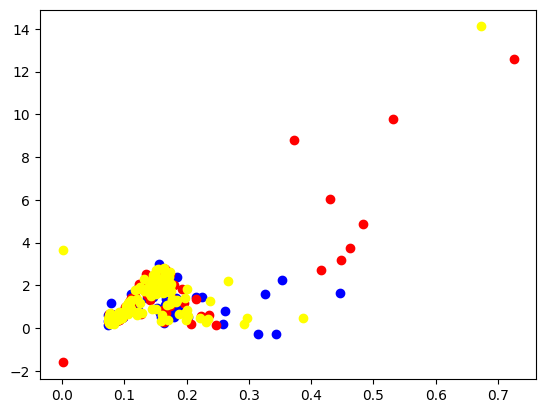

In [10]:
N = len(b_x_array)
plt.scatter(b_x_array[:N//3, 0], b_x_array[:N//3, 1], c='blue')
plt.scatter(b_x_array[N//3:2*N//3, 0], b_x_array[N//3:2*N//3, 1], c='red')
plt.scatter(b_x_array[2*N//3:, 0], b_x_array[2*N//3:, 1], c='yellow')
plt.show()

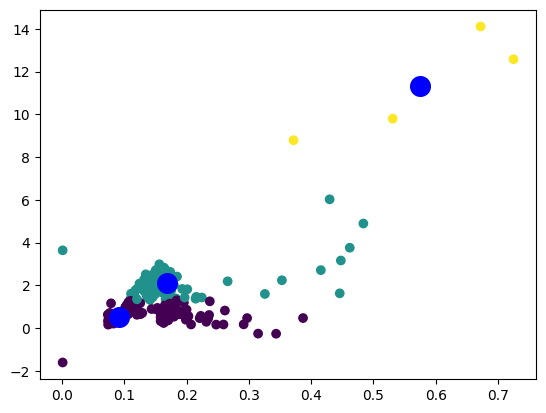

In [11]:
plt.scatter(b_x_array[:, 0], b_x_array[:, 1], c=b_kmeans.labels_)
plt.scatter(b_kmeans.cluster_centers_[:, 0], b_kmeans.cluster_centers_[:, 1], s = 200, c='b')
plt.show()

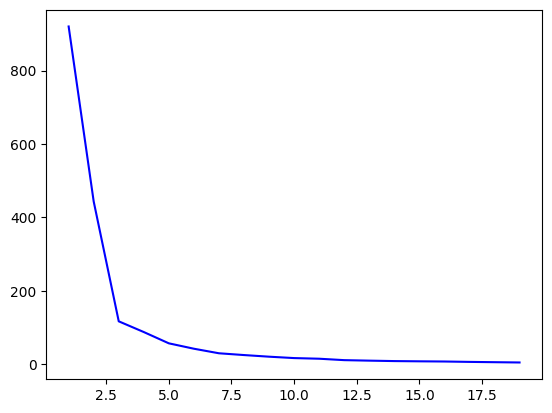

[920.221381940256, 443.21746524784425, 116.56550348173342, 87.32669205483401, 56.55108647640353, 41.8712903208084, 29.459770458661023, 24.614233151453103, 20.15865905070624, 16.36701999197332, 14.611884151073534, 10.746035387363793, 9.365612947209803, 8.19023668932032, 7.549063568871895, 7.027244870314344, 5.967423748773574, 5.15695747259032, 4.377232346206297]


In [12]:
elbow=[]
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 101, n_init = 'auto')
    kmeans.fit(b_x_array)
    elbow.append(kmeans.inertia_)
plt.plot(range(1, 20), elbow,color='blue')

plt.show()
print(elbow)

### (c) Is (a) or (b) the best feature set? What is the best number K of the best feature set?

In [ ]:
path, dirs, files = next(os.walk("./IMS_data/"))
c_x=[]
for file in files:
    data = pd.read_csv('./IMS_data/'+file, sep = '\t',
                       names = ['ch1', 'ch2', 'ch3', 'ch4'])
    ch1 = data.ch1.values
    mn = np.mean(ch1)
    sd = np.std(ch1)
    v = np.var(ch1)
    sk = skew(ch1)
    ku = kurtosis(ch1)
    c_x.append([mn, sd, v, sk, ku])
c_x_array = np.asarray(c_x)